# Notebook to test code

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import multiprocessing as mp
import scipy.stats as stats
import nibabel as nib
import os
os.environ['OMP_NUM_THREADS'] = str(1)
import statsmodels.api as sm
import sklearn.svm as svm
import statsmodels.sandbox.stats.multicomp as mc
import sklearn
from sklearn.feature_selection import f_classif
import seaborn as sns
import h5py
os.sys.path.append('glmScripts/')
import taskGLMPipeline as tgp

sns.set_style("white")
plt.rcParams["font.family"] = "FreeSans"


In [2]:
# Excluding 084
subjNums = ['013','014','016','017','018','021','023','024','026','027','028','030','031','032','033',
            '034','035','037','038','039','040','041','042','043','045','046','047','048','049','050',
            '053','055','056','057','058','062','063','066','067','068','069','070','072','074','075',
            '076','077','081','085','086','087','088','090','092','093','094','095','097','098','099',
            '101','102','103','104','105','106','108','109','110','111','112','114','115','117','119',
            '120','121','122','123','124','125','126','127','128','129','130','131','132','134','135',
            '136','137','138','139','140','141']



basedir = '/projects3/SRActFlow/'

# Using final partition
networkdef = np.loadtxt('/projects3/NetworkDiversity/data/network_partition.txt')
networkorder = np.asarray(sorted(range(len(networkdef)), key=lambda k: networkdef[k]))
networkorder.shape = (len(networkorder),1)
# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()

xticks = {}
reorderednetworkaffil = networkdef[networkorder]
for net in networks:
    netNum = networkmappings[net]
    netind = np.where(reorderednetworkaffil==netNum)[0]
    tick = np.max(netind)
    xticks[tick] = net

## General parameters/variables
nParcels = 360
nSubjs = len(subjNums)

glasserfile2 = '/projects/AnalysisTools/ParcelsGlasser2016/Q1-Q6_RelatedParcellation210.LR.CorticalAreas_dil_Colors.32k_fs_RL.dlabel.nii'
glasser2 = nib.load(glasserfile2).get_data()
glasser2 = np.squeeze(glasser2)

sortednets = np.sort(xticks.keys())
orderednetworks = []
for net in sortednets: orderednetworks.append(xticks[net])
    
networkpalette = ['royalblue','slateblue','paleturquoise','darkorchid','limegreen',
                  'lightseagreen','yellow','orchid','r','peru','orange','olivedrab']
networkpalette = np.asarray(networkpalette)

OrderedNetworks = ['VIS1','VIS2','SMN','CON','DAN','LAN','FPN','AUD','DMN','PMM','VMM','ORA']

# 0.0 Define functions for loading data

In [67]:
def loadInputActivity(subj,inputtype):
    x = tgp.loadTaskTiming(subj,'ALL')
    stimIndex = np.asarray(x['stimIndex'])
    ind = np.where(stimIndex==inputtype)[0]+1
    
    datadir = basedir + 'data/postProcessing/hcpPostProcCiric/'
    h5f = h5py.File(datadir + subj + '_glmOutput_data.h5','r')
    data = h5f['taskRegression/ALL_24pXaCompCorXVolterra_taskReg_betas_canonical'][:].copy()
    data = data[:,ind].copy()
    h5f.close()
    return data


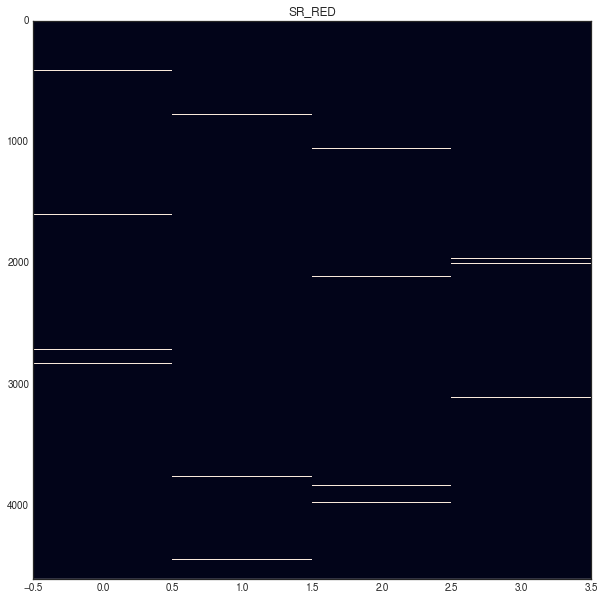

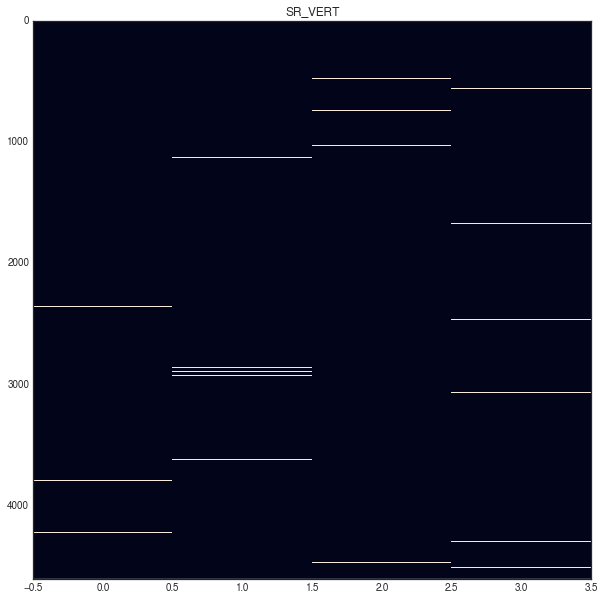

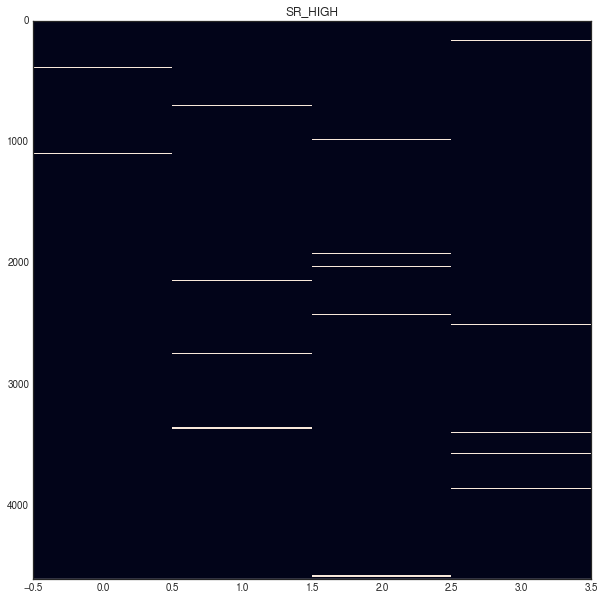

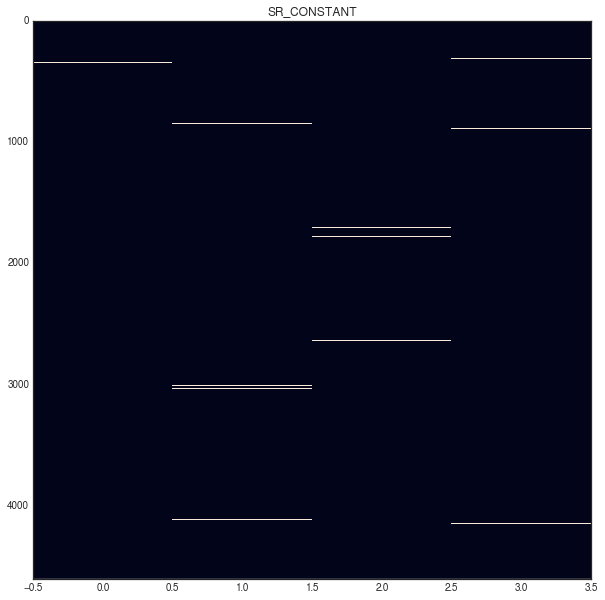

In [71]:
x = tgp.loadTaskTiming('141','ALL')
stimIndex = np.asarray(x['stimIndex'])
srHigh_ind = np.where(stimIndex=='srHigh')[0]
srRed_ind = np.where(stimIndex=='srRed')[0]
srConstant_ind = np.where(stimIndex=='srConstant')[0]
srVert_ind = np.where(stimIndex=='srVertical')[0]

plt.figure(figsize=(10,10))
plt.title('SR_RED')
plt.imshow(x['taskDesignMat'][:,srRed_ind],aspect='auto',interpolation='none')

plt.figure(figsize=(10,10))
plt.title('SR_VERT')
plt.imshow(x['taskDesignMat'][:,srVert_ind],aspect='auto',interpolation='none')

plt.figure(figsize=(10,10))
plt.title('SR_HIGH')
plt.imshow(x['taskDesignMat'][:,srHigh_ind],aspect='auto',interpolation='none')

plt.figure(figsize=(10,10))
plt.title('SR_CONSTANT')
plt.imshow(x['taskDesignMat'][:,srConstant_ind],aspect='auto',interpolation='none')

In [69]:
import constructDesignMatrices as cdm
cdm = reload(cdm)

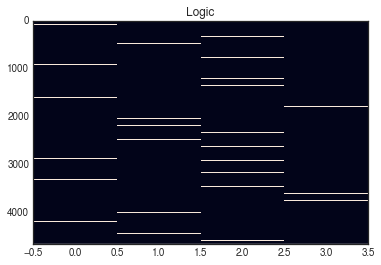

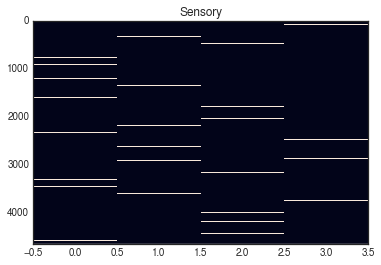

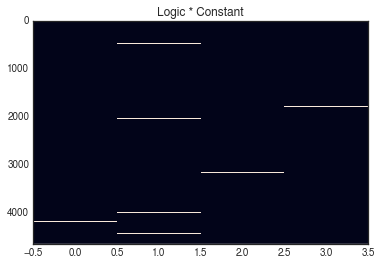

In [70]:
logic = cdm.loadLogic('040')
sensory = cdm.loadSensory('040')

plt.figure()
plt.title("Logic")
plt.imshow(logic,aspect='auto',interpolation='none')

plt.figure()
plt.title("Sensory")
plt.imshow(sensory,aspect='auto',interpolation='none')

tmp = np.zeros(sensory.shape)
for i in range(4):
    tmp[:,i] = np.multiply(logic[:,i],sensory[:,2])

plt.figure()
plt.title('Logic * Constant')
plt.imshow(tmp,aspect='auto',interpolation='none')